# Derek Jeter: Overrated?

## Derek Sanderson Jeter is an American former professional baseball shortstop, businessman, and baseball executive. As a player, Jeter spent his entire 20-year MLB career with the New York Yankees. Nicknamed "The Captain", Derek Jeter is soon to be inducted into the MLB Hall of Fame. There's no denying he was an amazing player, arguably the best player to ever play the shortstop position. But in baseball, there's two sides to the game. We will analyze Derek Jeter's batting performance over his career to see if he can really be the jack of all trades.

# Research Questions

How valuable was Derek Jeter to the NY Yankees when up to bat?

How much did Derek Jeter contribute to the wins based on the batting variables we chose to include?

Looking at other players, was Derek Jeter significantly better at getting a win? Did he contribute more?

Did Derek Jeter improve his batting performance throughout his seasons on the Yankees? Did he peak? Which season was his best? What are his most important contributing factors?

# Data Description


Year - the season the data is from.

RSLT - Result: Win or Loss, tracks whether the baseball game played was a win or a loss for the team

H - hits, tracks how many hits Derek Jeter had in a given game. A hit, also called a base hit, is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of an error or a fielder's choice

HR - home runs, tracks how many home runs Derek Jeter had in a given game. A home run is scored when the ball is hit in such a way that the batter is able to circle the bases and reach home safely in one play without any errors being committed by the defensive team in the process

SB - stolen base, tracks how many bases Derek Jeter had in a given game. A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.

BB - base on balls (walk) tracks how many walks Derek Jeter had in a given game. A base on balls, also known as a walk, occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out

WPA - win probability added, tracks Derek Jeter’s win probability added in a given game. Win probability added is a sport statistic which attempts to measure a player's contribution to a win by figuring the factor by which each specific play made by that player has altered the outcome of a game.

What are the observations (rows) and the attributes (columns)?

-- Each row represents a single game for the 20 seasons he played baseball. The columns each represent a different record of data, or a calculated statistic as explained above.

Why was this dataset created?

-- This data set was created for the purpose of tracking New York Yankees player, Derek Jeter. He was an outstanding player and these statistics were compiled together after each game, each season to allow MLB fans to look back on the result and statistics of the game, and to look at the individual players success.

What processes might have influenced what data was observed and recorded and what was not?

-- Any data that is considered a significant play is recorded. Whenever a player gets a hit, a homerun, times up to bat, etc. The dataset that we are utilizing is a batting log, so only plays that happen while up to bat or on base are recorded.

What preprocessing was done, and how did the data come to be in the form that you are using?

-- The only preprocessed variable in our usage of the dataset is the WPA, win probability added. This is calculated using the data collected throughout the game. We included this in our dataset to compare how much the variables we choose contributed to the actual win probability added.

If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

-- Yes, collecting sports statistics happens at every major league sporting event and even lower levels. The statistics and data are used for many different purposes. The data that is collected and analyzed is used to help increase fan experience and attendance from year to year. Sports analytics are crucial to many teams by helping them become their best through interpretation and analysis of statistics gained in games.



**NOTE**: Elaborate on benchmarks for jeter's numbers with maybe average of the MLB, give some context to whether or not his numbers are really good or not?


# Preregistration of analyses

1. We hope to examine which of Derek Jeter's statistics, whether that be walks, stolen bases, hits, home runs, or a combination of stats had the greatest impact on the win rate of the Yankees, how significant of an impact that was, and how our calculations per statistic compare to the overall win probability added (WPA) calculation of Jeter in a given game.



2. We want to determine if Derek Jeter's reputation as a hall of famer is overrated or not. We pulled 3 other fellow Yankees players from the 2010 season, one of Jeters best to see if Jeter is the jack of all trades. We know he is an all star in his short stop position. We wanted to focus on the batting side and see if he contributed more than most on both sides of the game.

make terms less ambiguous, clarify "jack of all trades", "all star" what does this mean relative to his performance

maybe compare the difference between best and worst seasons and whether or not his wpa is still high in bad seasons

# Data Collection and Cleaning

To collect our data, we scraped online databases of baseball statistics in order to pull all of Derek Jeter’s in game statistics on a game by game basis for every game of his career ranging from 1995 to 2014. This data contained all of his batting statistics including variables such as OPS, BA, CS, GDP, SH, SF, HBP, SO, IBB, RE24, cWPA, and other such acronyms relating to baseball measurements. However, not all of these variables are applicable or comparable in regards to the type of inferences we are trying to make. Thus, in our data cleaning process, we first evaluated which of the variables would be appropriate and comparable for our studies. We came up with a final list of variables including year, home runs, hits, game result, stolen bases, base on balls, and win probability added. These variables are unique in that they are recorded on a game by game basis and do not accumulate, unlike some of the other variables that were included in the stat sheet. Then, with these specific statistics chosen, we cleaned the data by simply excluding the statistics that we did not want, and then combining the statistics that we did want into a single dataframe which is easily processable and neat. Through this process, we cut our dataset from 38 columns over 19 dataframes to a more readable six columns all in one dataframe. 


In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from   sklearn.linear_model import LinearRegression, LogisticRegression
from   sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [3]:
#def concatenate(indir = 'C:\\Users\\wally\\OneDrive\\Documents\\Cornell\\First Year\\Spring Semester\\INFO 2950 Intro to Data Science\\derek_jeter', outfile = 'C:\\Users\\wally\\OneDrive\\Documents\\GitHub\\project2950\\JeterStats.csv'):
#    os.chdir(indir)
#    fileList = glob.glob('*.csv')
#    dfList = []
#    colnames = ['Year', 'Rk', 'Gcar', 'Gtm', 'Date', 'Tm', 'Column1', 'Opp', 'Rslt', 'Inngs', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'ROE',
#                'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS', 'BOP', 'aLI', 'WPA', 'acLI', 'cWPA', 'RE24', 'Pos']
#    for filename in fileList:
#        df = pd.read_csv(filename,header=None)
#        dfList.append(df)
#    concatDf = pd.concat(dfList,axis=0)
#    concatDf.columns = colnames
#    concatDf.to_csv(outfile,index=None)

#concatenate()


With this funciton, I processed 20 different CSV files, each of a different year of Derek Jeter's career, and concatenated them into one CSV file. I went through this consolidated CSV afterwards in order to cealn up some formatting/encoding erros by hand. This resulted in a single CSV sheet of all the games Derek Jeter played in his career.
With this function, I was able to process 22 different CSV files, each of a different year of Alex Rodriguez's career, and concatenate them into one CSV file. I had to go through the consolidated CSV afterwards in order to clean up some formatting/encoding errors, where the beginning year of each new year of Rodriguez's career had a non-unicode compatible symbol. I deleted these errors by hand to result in a single CSV sheet of all the games Rodriguez played in his career.


In [4]:
def stats_clean(player):
    player = player[['Year','Rk','Rslt', 'PA', 'H', 'HR', 'SB', 'BB', 'WPA',]]
    player['win'] = player.Rslt.apply(lambda x: 1 if 'W' in x else 0)
    player['0SB'] = (player['SB'] == 0)
    player['1SB'] = (player['SB'] == 1)
    player['2SB'] = (player['SB'] == 2)
    player['3SB'] = (player['SB'] == 3)
    player['4SB'] = (player['SB'] == 4)
    player["0SB"] = player["0SB"].astype(int)
    player["1SB"] = player["1SB"].astype(int)
    player["2SB"] = player["2SB"].astype(int)
    player["3SB"] = player["3SB"].astype(int)
    player["4SB"] = player["4SB"].astype(int)
    return player

This function allows the fast cleaning of data tables (which contain a lot of stats that we are not utilizing in our examination of each player) and cuts down on the amount of repetitive code. This code pulls out a select number of columns, including the result of the game (Rslt), hits (H), homeruns (HR), walks (BB), and win percentage added (WPA). In addition, this function adds a column called 'win' to the resultant dataframe, which reads the Rslt column and adds a 1 to the column if there is a W under Rslt, and adds a 0 if there is a L under Rslt.

## Derek Jeter

In [5]:
jeter = pd.read_csv("JeterStats.csv")

In [6]:
jeter = stats_clean(jeter)
jeter.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Year,Rk,Rslt,PA,H,HR,SB,BB,WPA,win,0SB,1SB,2SB,3SB,4SB
0,1995,1,"L,7-8",5,0,0,0,0,-0.231,0,1,0,0,0,0
1,1995,2,"L,3-7",4,2,0,0,1,0.066,0,1,0,0,0,0
2,1995,3,"L,9-11",4,1,0,0,1,0.072,0,1,0,0,0,0
3,1995,4,"L,2-3",3,0,0,0,0,-0.072,0,1,0,0,0,0
4,1995,5,"L,2-4",4,1,0,0,0,0.045,0,1,0,0,0,0


## Bernie Williams

Bernabé (Bernie) Williams Figueroa Jr. is a Puerto Rican former professional baseball player. He played his entire 16-year career in Major League Baseball with the New York Yankees from 1991 through 2006. He was a center fielder.

In [7]:
williams = pd.read_csv('williams_1999.csv')

In [8]:
williams = stats_clean(williams)
williams.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Year,Rk,Rslt,PA,H,HR,SB,BB,WPA,win,0SB,1SB,2SB,3SB,4SB
0,1999,1,"L,3-5",4,1,0,0,0,-0.033,0,1,0,0,0,0
1,1999,2,"W,7-4",5,2,0,0,1,-0.006,1,1,0,0,0,0
2,1999,3,"W,4-0",4,0,0,0,0,-0.079,1,1,0,0,0,0
3,1999,4,"W,12-3",3,0,0,0,0,-0.025,1,1,0,0,0,0
4,1999,5,"W,5-0",4,3,0,0,0,0.071,1,1,0,0,0,0


## Nomar Garciaparra

Nomar Garciaparra is an American former professional baseball shortstop. After playing parts of nine seasons as a shortstop for the Boston Red Sox, he played shortstop, third base and first base for the Chicago Cubs, Los Angeles Dodgers, and the Oakland Athletics.

In [9]:
garciaparra = pd.read_csv('garciaparra_1999.csv')

In [10]:
garciaparra = stats_clean(garciaparra)
garciaparra.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Year,Rk,Rslt,PA,H,HR,SB,BB,WPA,win,0SB,1SB,2SB,3SB,4SB
0,1999,1,"W,5-3",5,1,0,0,1,-0.019,1,1,0,0,0,0
1,1999,2,"W,6-0",5,1,0,0,2,0.093,1,1,0,0,0,0
2,1999,3,"L,4-5",1,0,0,0,0,-0.087,0,1,0,0,0,0
3,1999,4,"W,8-5",5,1,0,0,1,-0.042,1,1,0,0,0,0
4,1999,5,"L,1-5",4,2,0,1,2,0.157,0,0,1,0,0,0


## Alex Rodriguez

In [11]:
rodriguez = pd.read_csv('arod_concatenated.csv')

In [12]:
rodriguez = stats_clean(rodriguez)
rodriguez.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Year,Rk,Rslt,PA,H,HR,SB,BB,WPA,win,0SB,1SB,2SB,3SB,4SB
0,1994,1,"L,3-4",3,0,0,0,0,-0.099,0,1,0,0,0,0
1,1994,2,"W,7-4",4,2,0,1,0,0.043,1,0,1,0,0,0
2,1994,3,"L,2-9",4,0,0,0,0,-0.026,0,1,0,0,0,0
3,1994,4,"L,8-13",4,1,0,1,0,-0.015,0,0,1,0,0,0
4,1994,5,"L,8-10",5,1,0,0,0,-0.205,0,1,0,0,0,0


# Data Limitations

Baseball statistics are inherently limited in the scope of what they measure. Thus, our dataset can only provide limited conclusions as well. This dataset could include many other statistics if it were to be complete and provide the best, most accurate conclusions, but due to the difficulty of processing so many variables and the time constraints of this project, we chose only the most important ones. There is the possibility that there is human error in recording the information, and it is possible that the older statistics from 1995 are not as precise as the ones gathered more recently, given new technology in sports statistic reporting and recording. 


# Jeter Calculations and Statistical Tests

In [13]:
contribute = jeter.WPA.mean()
print('Mean WPA: {:.6f}'.format(contribute))

Mean WPA: 0.011262


Win probability added is a sport statistic which attempts to measure a player's contribution to a win by figuring the factor by which each specific play made by that player has altered the outcome of a game. So we know Jeter made a contribution to the wins over the 20 seasons he played. Looking at the mean WPA of 0.011262, the positive value shows that on average he contributed to a win. This value is extremely low and close to zero, but it also is taking all 20 years and 2,747 games into account. So for that length of time having any positive value is impressive. This number has some limitations as a win or loss is not soley based on Jeter's performance. But as we continue to analyze his statistics we can further prove he made a positive contribution to the New York Yankees over his 20 seasons.

In [14]:
walks = np.array(jeter.loc[:,"BB"])
wins = np.array(jeter.loc[:,"win"])
correlation_bb_wins = np.corrcoef(walks,wins)
print("Correlation between walks and wins: ", round(correlation_bb_wins[0][1],4))

Correlation between walks and wins:  0.0581


There is a slight positive correlation between the number of walks Derek Jeter had and the number of wins the Yankees had. This makes sense, as getting to first base is a first step towards scoring, and ultimately towards winning a game.

In [15]:
sb = np.array(jeter.loc[:,"SB"])
wins = np.array(jeter.loc[:,"win"])
correlation_sb_wins = np.corrcoef(sb,wins)
print('Correlation between stolen bases and wins: ', round(correlation_sb_wins[0][1],4))

Correlation between stolen bases and wins:  0.0628


Again there is a slight positive correlation between the number of stolen bases Derek Jeter had and the number of wins he had. Meaning if he stole a base, there is a slight positive probability that the Yankees won that game.

In [16]:
real_slope = correlation_sb_wins[0][1]
real_x = np.array(jeter.loc[:,'SB'])
noise = np.random.normal(0,0.5, size=len(jeter.loc[:,"SB"]))
real_y = real_x * real_slope  +  noise
df = pd.DataFrame({"SB": real_x, "win": real_y})
model = LinearRegression().fit(df[["SB"]], df["win"])
print("Estimated Slope: ", model.coef_[0])

Estimated Slope:  0.06168203780497715


Text(0.5, 1.0, 'Scatterplot Comparing Stolen Bases and Wins for Derek Jeter')

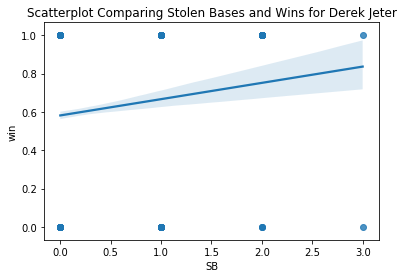

In [17]:
sns.regplot(data = jeter, x = 'SB', y = 'win')
plt.show
plt.title('Scatterplot Comparing Stolen Bases and Wins for Derek Jeter')

In [18]:
lr = LinearRegression()
model = lr.fit(jeter[['SB']], jeter['win'])
slope = model.coef_[0]
print("The regression slope of the stolen bases variable is {:.2f}".format(slope))

The regression slope of the stolen bases variable is 0.08


As shown above, it appears that there is a slight positive correlation between the number of stolen bases Derek Jeter had and the wins of the Yankees. The slight positive regression slope tells us that as the number of stolen bases increased for Derek Jeter, the greater the probability that the Yankees won the game. This means that he is a productive player and his stolen bases definitively contribute to his team's success!

In [19]:
lr2 = LinearRegression()
model2 = lr2.fit(jeter[['SB', '0SB', '1SB', '2SB', '3SB']], jeter['win'])
model2.coef_

array([-0.00465011, -0.07315303,  0.00990517,  0.20429887, -0.14105101])

In [20]:
print('The multivariable regression slope is {:.2f}'.format(model2.coef_[0]))

The multivariable regression slope is -0.00


In [21]:
jeter_total_PA = jeter.PA.sum()
jeter_total_hits = jeter.H.sum()
jeter_hit_to_PA_ratio = jeter_total_hits/jeter_total_PA
print('Derek Jeters ratio of hits per plate appearance is: {:.3f}'.format(jeter_hit_to_PA_ratio))
print('This means that on average it takes Derek Jeter 3.63 plate appearances, which means he is up on plate at bat, in order for him to register one hit')

Derek Jeters ratio of hits per plate appearance is: 0.275
This means that on average it takes Derek Jeter 3.63 plate appearances, which means he is up on plate at bat, in order for him to register one hit


^^^what does this tell us?

# Derek Jeter Yearly Stats

In [22]:
def totals_per_year(stat):
    np.arange(jeter["Year"].min(),jeter["Year"].max())
    num_year = jeter.groupby('Year').sum()
    years_played = jeter["Year"].unique()
    plt.bar(x = years_played, height = num_year[stat])
    plt.xlabel('Years')
    plt.ylabel(stat)
    plt.title("Jeter's "+stat+ " Totals per Year")
    plt.xticks(np.arange(min(years_played), max(years_played)+1, 2.0))
    plt.show()

In [23]:
def top_three_stat_years(stat1):
    num_year = jeter.groupby('Year').sum()
    stat1_ranking = num_year[stat1].rank()
    stat1_sorted = sorted(stat1_ranking, reverse = True)
    print('The year Jeter had the most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[0]].index.values[0]))
    print('The year Jeter had the second most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[1]].index.values[0]))
    print('The year Jeter had the third most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[2]].index.values[0]))

This function returns the top three statistical years for a given category named by a parameter called stat1

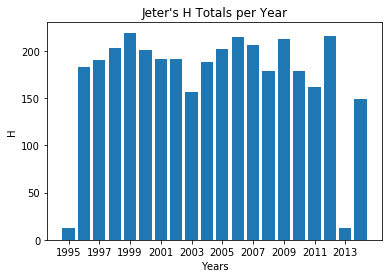

In [24]:
totals_per_year('H')

In [25]:
top_three_stat_years('H')

The year Jeter had the most H was 1999
The year Jeter had the second most H was 2012
The year Jeter had the third most H was 2006


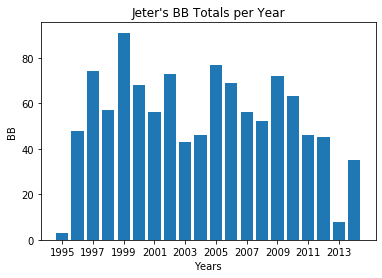

In [26]:
totals_per_year('BB')

In [27]:
top_three_stat_years('BB')

The year Jeter had the most BB was 1999
The year Jeter had the second most BB was 2005
The year Jeter had the third most BB was 1997


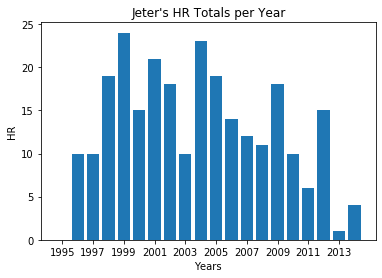

In [28]:
totals_per_year('HR')

In [29]:
top_three_stat_years('HR')

The year Jeter had the most HR was 1999
The year Jeter had the second most HR was 2004
The year Jeter had the third most HR was 2001


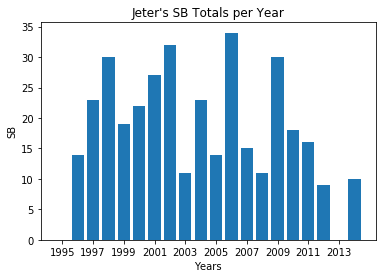

In [30]:
totals_per_year('SB')

In [31]:
top_three_stat_years('SB')

The year Jeter had the most SB was 2006
The year Jeter had the second most SB was 2002
The year Jeter had the third most SB was 1998


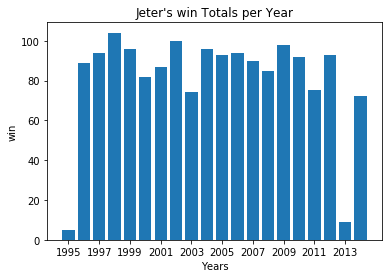

In [32]:
totals_per_year('win')

In [33]:
top_three_stat_years('win')

The year Jeter had the most win was 1998
The year Jeter had the second most win was 2002
The year Jeter had the third most win was 2009


Derek Jeter's best year of performance was 1999, where he had his career high hits, walks, and homeruns. 

To further look at Jeter's contributions and importance to the NY Yankees, will will be using his 1999 season to compare to other players in the same season. This will allow us to compare his batting statistics with other players who batted similarly well in 1999 (according to ESPN's batting leaders 1999 https://www.espn.com/mlb/history/leaders/_/breakdown/season/year/1999) to see if he contributed more to a team win than other players who also batted well. 

The reset_index applied to jeter_1999 resets the index of the new dataframe to zero so that it may be compared to players Williams and Garciaparra later on. Indicies with identical starting points are required for direct comparison.

In [34]:
jeter_1999 = jeter.loc[jeter['Year'] == 1999]
jeter_1999 = jeter_1999.reset_index(drop = True)
jeter_1999.head()

,Year,Rk,Rslt,PA,H,HR,SB,BB,WPA,win,0SB,1SB,2SB,3SB,4SB
0,1999,1,"L,3-5",4,3,1,0,0,0.239,0,1,0,0,0,0
1,1999,2,"W,7-4",5,3,0,0,0,0.137,1,1,0,0,0,0
2,1999,3,"W,4-0",5,1,0,0,0,-0.043,1,1,0,0,0,0
3,1999,4,"W,12-3",4,0,0,0,2,0.001,1,1,0,0,0,0
4,1999,5,"W,5-0",5,1,0,0,1,0.083,1,1,0,0,0,0


# Comparing Jeter to Rodriguez

##### "Jeter's Impact on Wins When Stealing 1 Base"

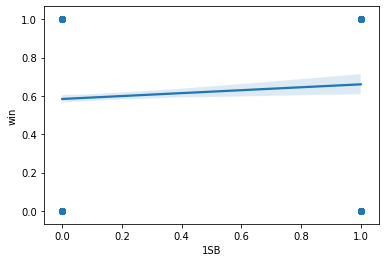

In [35]:
sns.regplot(x=('1SB'), y='win', data=jeter);

In [36]:
lr = LinearRegression()
model = lr.fit(jeter[['1SB']], jeter['win'])
slope = model.coef_[0]
print("The regression slope of the stolen bases variable is {:.2f}".format(slope))

The regression slope of the stolen bases variable is 0.08


##### "Rodriguez's Impact on Wins When Stealing 1 Base"

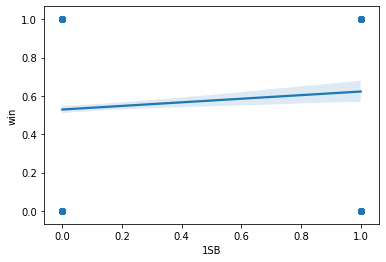

In [37]:
sns.regplot(x=('1SB'), y='win', data=rodriguez);

In [38]:
lr = LinearRegression()
model = lr.fit(rodriguez[['1SB']], rodriguez['win'])
slope = model.coef_[0]
print("The regression slope of the stolen bases variable is {:.2f}".format(slope))

The regression slope of the stolen bases variable is 0.09


##### Analysis
According to these calculated numbers, when Derek Jeter had 1 steal in a game, he had a minimally lesser impact on the wins of his team than when Alex Rodriguez had 1 steal in a game. Examining the regression slopes relating wins to 1 stolen bases, Jeter's is 0.08 while Rodriguez's is 0.09.

##### Comparing the PA to Hit ratio of Rodriguez and Jeter

In [39]:
rodriguez_total_PA = rodriguez.PA.sum()
rodriguez_total_hits = rodriguez.H.sum()
rodriguez_hit_to_PA_ratio = rodriguez_total_hits/rodriguez_total_PA
print("Alex Rodriguez's career hit to plate appearance ratio is {:.3f}".format(rodriguez_hit_to_PA_ratio))
print("Derek Jeter's career hit to plate appearance ration is {:.3f}".format(jeter_hit_to_PA_ratio))

Alex Rodriguez's career hit to plate appearance ratio is 0.255
Derek Jeter's career hit to plate appearance ration is 0.275


##### Analysis
This means that Derek Jeter is on average a more efficient hitter, registering more hits per plate appearance than Alex Rodriguez. But what about in each of their best seasons? Which of these two greats was greater in their prime?

In [40]:
def top_three_stat_years_arod(stat1):
    num_year = rodriguez.groupby('Year').sum()
    stat1_ranking = num_year[stat1].rank()
    stat1_sorted = sorted(stat1_ranking, reverse = True)
    print('The year Rodriguez had the most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[0]].index.values[0]))
    print('The year Rodriguez had the second most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[1]].index.values[0]))
    print('The year Rodriguez had the third most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[2]].index.values[0]))

In [41]:
top_three_stat_years_arod('H')

The year Rodriguez had the most H was 1996
The year Rodriguez had the second most H was 1998
The year Rodriguez had the third most H was 2001


In [42]:
top_three_stat_years_arod('HR')

The year Rodriguez had the most HR was 2002
The year Rodriguez had the second most HR was 2007
The year Rodriguez had the third most HR was 2001


In [43]:
top_three_stat_years_arod('win')

The year Rodriguez had the most win was 2004
The year Rodriguez had the second most win was 2005
The year Rodriguez had the third most win was 2006


Alex Rodriguez's best year for hitting was 1996, and Derek Jeter's best hitting year was 1999, so let's compare the hit to PA ratio of the two between these two years to see who was greater in their prime.

In [44]:
rodriguez_1996 = rodriguez.loc[rodriguez.Year == 1996]
#rodriguez calculations
rodriguez_total_PA_1996 = rodriguez_1996.PA.sum()
rodriguez_total_hits_1996 = rodriguez_1996.H.sum()
rodriguez_hit_to_PA_ratio_1996 = rodriguez_total_hits_1996/rodriguez_total_PA_1996
print("Alex Rodriguez's hit to PA ratio in his greatest year of hitting (1996) was: {:.2f}".format(rodriguez_hit_to_PA_ratio_1996))
#jeter calculations
jeter_total_PA_1999 = jeter_1999.PA.sum()
jeter_total_hits_1999 = jeter_1999.H.sum()
jeter_hit_to_PA_ratio_1999 = jeter_total_hits_1999/jeter_total_PA_1999
print("Derek Jeter's hit to PA ratio in his greatest year of hitting (1999) was: {:.2f}".format(jeter_hit_to_PA_ratio_1999))

Alex Rodriguez's hit to PA ratio in his greatest year of hitting (1996) was: 0.32
Derek Jeter's hit to PA ratio in his greatest year of hitting (1999) was: 0.30


##### Analysis
What we can tell from this information is that in their primes, Alex Rodriguez was a more efficient hitter than Derek Jeter, registering a hit about every 3.13 times he was at bat, whereas Jeter registered a hit about every 3.33 times he was at bat, not too far off, but definitely less. Did this difference affect how much these players helped their team win?

# Comparing Jeter to Williams and Garciaparra

Now after selecting the same variables as we used with Jeter, we can use these statistics to compare the contribution that Jeter made to players Bernie Williams and Nomar Garciaparra, who batted similarly well in the 1999 season (Jeter's best statistical season)

In [45]:
print('Jeter total wins in 1999: ', jeter_1999.win.sum())
print('Williams total wins in 1999: ', williams.win.sum())
print('Garciaparra total wins in 1999: ', garciaparra.win.sum())

Jeter total wins in 1999:  96
Williams total wins in 1999:  96
Garciaparra total wins in 1999:  80


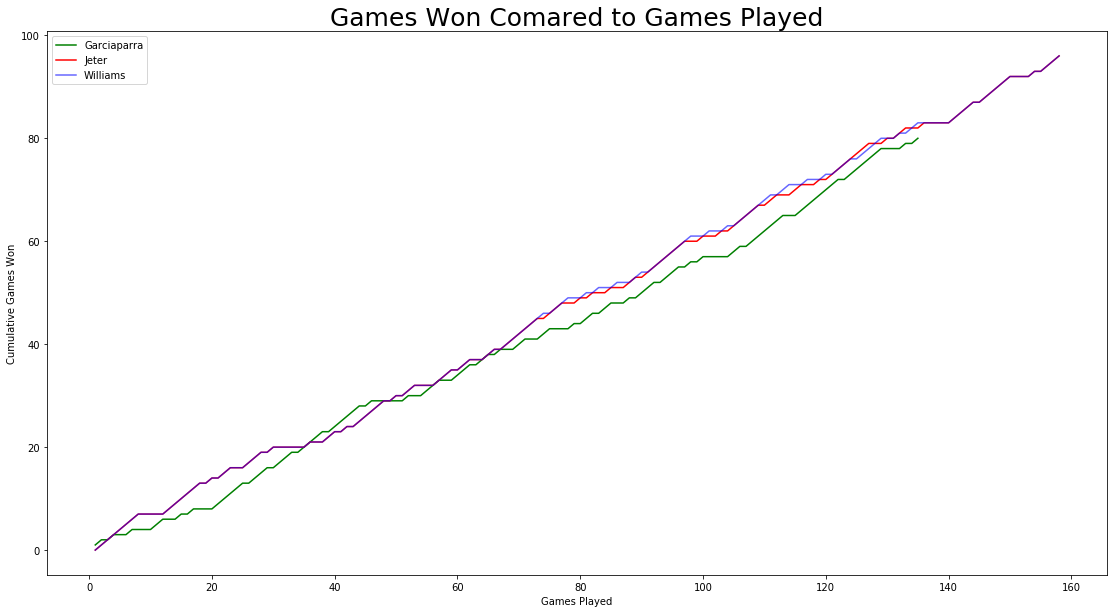

In [65]:
plt.figure(figsize=(19,10))
plt.plot(garciaparra['Rk'], np.cumsum(garciaparra['win']), color = 'green', label='Garciaparra')
plt.plot(jeter_1999['Rk'], np.cumsum(jeter_1999['win']), color = 'red', label='Jeter')
plt.plot(williams['Rk'], np.cumsum(williams['win']), color = 'blue', alpha = 0.6, label='Williams')
plt.ylabel('Cumulative Games Won')
plt.xlabel('Games Played')
plt.title('Games Won Comared to Games Played', fontsize=25)
plt.legend()
plt.show()

From this initial analysis of total wins vs total games played for the 1999 season for all of these players, we can see that the green line, representing Garciaparra has the lowest slope meaning the lowest number of wins. But Jeter and Williams, the red line and blue line, are neck and neck throughout the season. At the end it is still unclear who has more wins from the graph although we found above Jeter and Williams both have 96, but now we will more on to further compare these players to clear up this discrepancy.

In [48]:
print('Jeter total hits in 1999: ', jeter_1999.H.sum())
print('Williams total hits in 1999: ', williams.H.sum())
print('Garciaparra total hits in 1999: ', garciaparra.H.sum())

Jeter total hits in 1999:  219
Williams total hits in 1999:  202
Garciaparra total hits in 1999:  190


When looking at total hits, Jeter had the most hits in the 1999 season but also played in more games than the rest of the players. But a hit does not gain a point in the game of baseball. What does? Homeruns.

In [60]:
print('Jeter total homeruns in 1999: ', jeter_1999.HR.sum())
print('Williams total homeruns in 1999: ', williams.HR.sum())
print('Garciaparra total homeruns in 1999: ', garciaparra.HR.sum())

Jeter total homeruns in 1999:  24
Williams total homeruns in 1999:  25
Garciaparra total homeruns in 1999:  27


Jeter homerun to hit ratio in 1999:  0.1095890410958904
Williams homerun to hit ratio in 1999:  0.12376237623762376
Garciaparra homerun to hit ratio in 1999:  0.14210526315789473


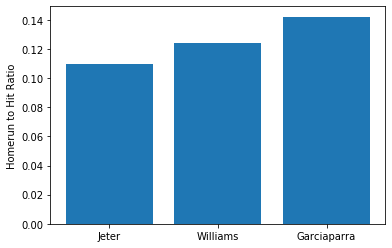

In [50]:
print('Jeter homerun to hit ratio in 1999: ', jeter_1999.HR.sum()/jeter_1999.H.sum())
print('Williams homerun to hit ratio in 1999: ', williams.HR.sum()/williams.H.sum())
print('Garciaparra homerun to hit ratio in 1999: ', garciaparra.HR.sum()/garciaparra.H.sum())

data = [['Jeter', jeter_1999.HR.sum()/jeter_1999.H.sum()], ['Williams', williams.HR.sum()/williams.H.sum()], ['Garciaparra', garciaparra.HR.sum()/garciaparra.H.sum()]]
ratios = pd.DataFrame(data, columns = ['Name', 'Ratio'])
plt.bar(x=ratios['Name'], height=ratios['Ratio'])
#plt.xlabel('Player')
plt.ylabel('Homerun to Hit Ratio')
plt.show()

Using the total homeruns and hits from each player, I calculated the ratio of homeruns to hits. This number represents the probability that if a player records a hit, it is a home run. Jeter's is less than Williams's, whom has the next lowest. This still makes sense, as Jeter was never a power hitter. 

# REDO THIS DESCRIPTION BOX NEED BETTER EXPLANATION
Derek Jeter although finishing on top with wins and hits falls short when it comes to homeruns. Only having 24 homeruns for his peak season may seem like Jeter was not as beneficaial of a player as he gets recognition for. However, it is important to note that X PLAYERS were both middle of the lineup players who typically hit with more power, while Jeter was a leadoff man who's primary offensive goal was to get on base in order to get driven in by the players who were more likely to record an extra base hit, allowing Jeter to score from any base.

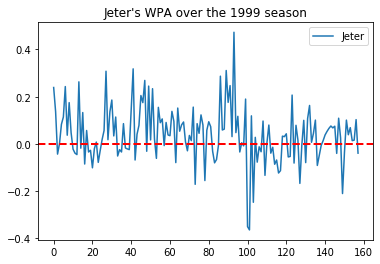

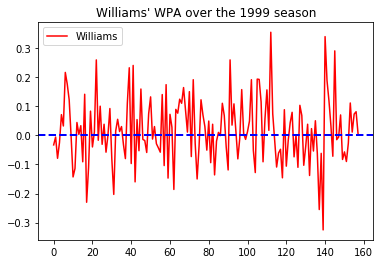

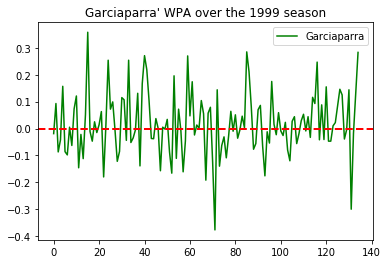

In [67]:
compare_WPA = pd.DataFrame(columns = ['Jeter', 'Williams', 'Garciaparra'])
compare_WPA['Jeter'] = jeter_1999.WPA
compare_WPA['Williams'] = williams.WPA
compare_WPA['Garciaparra'] = garciaparra.WPA
compare_WPA.head()
compare_WPA.plot(y='Jeter')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title("Jeter's WPA over the 1999 season")
plt.show()
compare_WPA.plot(y='Williams', color='red')
plt.axhline(y=0, color='b', linestyle='--', lw=2)
plt.title("Williams' WPA over the 1999 season")
plt.show()
compare_WPA.plot(y='Garciaparra', color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title("Garciaparra' WPA over the 1999 season")
plt.show()

These 3 line plots represent Jeter's, Williams', and Garciaparra's WPA over the 1999 season. WPA meaning win probability added will be negative for a loss and postive for a win. I added in a dotted line when the WPA equals zero to see if the player contributed positively or negatively for the majority of the season. Jeter seems to have the most positive contributions, next Williams, and finally Garciaparra. Looking broadly at these three players this makes sense. Although we found that Jeter is not an all star hitter, overall through contributions besides homeruns and the recorded stats we used, he has contributed more towards the Yankees wins than Williams and Garciaparra.